# KELOMPOK 4

- Dian Filia Matondang            (12S19003)
- Amelia Jane Audri Lumbanraja    (12S19005)
- Cintya Yossy Silvana Nainggolan (12S19006)

## DATA UNDERSTANDING

### Preview Dataset

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import sklearn
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
case_cost = pd.read_csv("case_cost_prediction_train.csv")
case_cost

,row_id,tglpelayanan,kddati2,tkp,peserta,a,b,c,cb,d,...,kp,kt,ku,s,sa,sb,sc,sd,case,unit_cost
0,1,4/1/2014 0:00,332,40,179530,0,0,1,0,1,...,0,0,0,0,0,0,0,0,266,3.597440e+06
1,2,11/1/2016 0:00,54,40,104782,0,1,0,0,0,...,0,0,1,0,0,0,1,1,2453,4.951008e+06
2,3,5/1/2016 0:00,323,30,280645,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1690,1.984208e+05
3,4,11/1/2018 0:00,318,40,178685,0,1,0,0,0,...,0,0,0,0,0,0,0,3,1321,4.008756e+06
4,5,10/1/2019 0:00,150,30,1199321,1,0,1,0,0,...,1,0,0,0,0,1,0,5,73056,3.072272e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57966,57967,3/1/2019 0:00,241,40,157213,0,0,1,0,0,...,0,0,0,0,0,0,0,0,410,3.443332e+06
57967,57968,9/1/2019 0:00,338,30,402173,0,0,1,0,0,...,0,0,0,0,0,0,0,0,8272,2.128621e+05
57968,57969,6/1/2016 0:00,241,40,99401,0,0,1,0,0,...,0,0,0,0,0,0,0,0,294,3.028611e+06
57969,57970,1/1/2018 0:00,147,40,509495,0,0,1,0,0,...,0,0,0,0,0,0,2,0,1983,3.629365e+06


### Preview Data Types

In [5]:
print(case_cost.dtypes)

row_id            int64
tglpelayanan     object
kddati2           int64
tkp               int64
peserta           int64
a                 int64
b                 int64
c                 int64
cb                int64
d                 int64
ds                int64
gd                int64
hd                int64
i1                int64
i2                int64
i3                int64
i4                int64
kb                int64
kc                int64
kg                int64
ki                int64
kj                int64
kk                int64
kl                int64
km                int64
ko                int64
kp                int64
kt                int64
ku                int64
s                 int64
sa                int64
sb                int64
sc                int64
sd                int64
case              int64
unit_cost       float64
dtype: object


In [6]:
case_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57971 entries, 0 to 57970
Data columns (total 36 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   row_id        57971 non-null  int64  
 1   tglpelayanan  57971 non-null  object 
 2   kddati2       57971 non-null  int64  
 3   tkp           57971 non-null  int64  
 4   peserta       57971 non-null  int64  
 5   a             57971 non-null  int64  
 6   b             57971 non-null  int64  
 7   c             57971 non-null  int64  
 8   cb            57971 non-null  int64  
 9   d             57971 non-null  int64  
 10  ds            57971 non-null  int64  
 11  gd            57971 non-null  int64  
 12  hd            57971 non-null  int64  
 13  i1            57971 non-null  int64  
 14  i2            57971 non-null  int64  
 15  i3            57971 non-null  int64  
 16  i4            57971 non-null  int64  
 17  kb            57971 non-null  int64  
 18  kc            57971 non-nu

### Descripe Statistic Data

In [7]:
case_cost.describe(include='all')

,row_id,tglpelayanan,kddati2,tkp,peserta,a,b,c,cb,d,...,kp,kt,ku,s,sa,sb,sc,sd,case,unit_cost
count,57971.000000,57971,57971.000000,57971.000000,5.797100e+04,57971.000000,57971.000000,57971.000000,57971.000000,57971.000000,...,57971.000000,57971.000000,57971.000000,57971.000000,57971.000000,57971.000000,57971.000000,57971.000000,57971.000000,5.797100e+04
unique,NaN,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,7/1/2017 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,28986.000000,NaN,246.423125,34.990081,3.562209e+05,0.041538,0.388574,0.788894,0.000380,0.281710,...,0.039899,0.004330,0.001829,0.004123,0.002018,0.228476,0.953028,0.644943,6539.418451,1.961092e+06
std,16734.930565,NaN,143.447935,5.000033,4.120323e+05,0.210390,0.660382,0.679786,0.019477,0.595284,...,0.210092,0.065659,0.042722,0.082443,0.044880,0.925357,2.225974,1.234201,17607.280021,1.889367e+06
min,1.000000,NaN,1.000000,30.000000,8.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+05
25%,14493.500000,NaN,125.000000,30.000000,1.127735e+05,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,424.000000,2.336742e+05
50%,28986.000000,NaN,243.000000,30.000000,1.975800e+05,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1359.000000,6.547994e+05
75%,43478.500000,NaN,362.000000,40.000000,4.386935e+05,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4583.000000,3.531702e+06


In [8]:
case_cost['kddati2'].describe()

count    57971.000000
mean       246.423125
std        143.447935
min          1.000000
25%        125.000000
50%        243.000000
75%        362.000000
max        528.000000
Name: kddati2, dtype: float64

In [9]:
case_cost['tkp'].describe()

count    57971.000000
mean        34.990081
std          5.000033
min         30.000000
25%         30.000000
50%         30.000000
75%         40.000000
max         40.000000
Name: tkp, dtype: float64

In [10]:
case_cost['peserta'].describe()

count    5.797100e+04
mean     3.562209e+05
std      4.120323e+05
min      8.000000e+00
25%      1.127735e+05
50%      1.975800e+05
75%      4.386935e+05
max      3.328509e+06
Name: peserta, dtype: float64

In [11]:
case_cost['case'].describe()

count     57971.000000
mean       6539.418451
std       17607.280021
min           1.000000
25%         424.000000
50%        1359.000000
75%        4583.000000
max      333441.000000
Name: case, dtype: float64

In [12]:
case_cost['unit_cost'].describe()

count    5.797100e+04
mean     1.961092e+06
std      1.889367e+06
min      1.000000e+05
25%      2.336742e+05
50%      6.547994e+05
75%      3.531702e+06
max      2.690550e+07
Name: unit_cost, dtype: float64

In [13]:
case_cost.mean()

C:\Users\DIANMT~1\AppData\Local\Temp/ipykernel_12452/2646893874.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  case_cost.mean()


row_id       2.898600e+04
kddati2      2.464231e+02
tkp          3.499008e+01
peserta      3.562209e+05
a            4.153801e-02
b            3.885736e-01
c            7.888944e-01
cb           3.795001e-04
d            2.817098e-01
ds           0.000000e+00
gd           4.610926e-02
hd           3.531076e-02
i1           6.175502e-03
i2           5.016301e-02
i3           1.112970e-01
i4           1.204568e-01
kb           2.378776e-02
kc           8.590502e-03
kg           9.746252e-03
ki           2.389643e-01
kj           7.662452e-02
kk           3.484501e-03
kl           1.271670e-01
km           7.151852e-02
ko           3.950251e-03
kp           3.989926e-02
kt           4.329751e-03
ku           1.828500e-03
s            4.122751e-03
sa           2.018251e-03
sb           2.284763e-01
sc           9.530282e-01
sd           6.449432e-01
case         6.539418e+03
unit_cost    1.961092e+06
dtype: float64

In [14]:
case_cost.sum()

row_id                                                 1680347406
tglpelayanan    4/1/2014 0:0011/1/2016 0:005/1/2016 0:0011/1/2...
kddati2                                                  14285395
tkp                                                       2028410
peserta                                               20650478910
a                                                            2408
b                                                           22526
c                                                           45733
cb                                                             22
d                                                           16331
ds                                                              0
gd                                                           2673
hd                                                           2047
i1                                                            358
i2                                                           2908
i3        

In [15]:
case_cost.median()

C:\Users\DIANMT~1\AppData\Local\Temp/ipykernel_12452/2488611067.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  case_cost.median()


row_id        28986.0000
kddati2         243.0000
tkp              30.0000
peserta      197580.0000
a                 0.0000
b                 0.0000
c                 1.0000
cb                0.0000
d                 0.0000
ds                0.0000
gd                0.0000
hd                0.0000
i1                0.0000
i2                0.0000
i3                0.0000
i4                0.0000
kb                0.0000
kc                0.0000
kg                0.0000
ki                0.0000
kj                0.0000
kk                0.0000
kl                0.0000
km                0.0000
ko                0.0000
kp                0.0000
kt                0.0000
ku                0.0000
s                 0.0000
sa                0.0000
sb                0.0000
sc                0.0000
sd                0.0000
case           1359.0000
unit_cost    654799.4467
dtype: float64

In [16]:
case_cost.std()

C:\Users\DIANMT~1\AppData\Local\Temp/ipykernel_12452/4108202680.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  case_cost.std()


row_id       1.673493e+04
kddati2      1.434479e+02
tkp          5.000033e+00
peserta      4.120323e+05
a            2.103898e-01
b            6.603823e-01
c            6.797864e-01
cb           1.947723e-02
d            5.952836e-01
ds           0.000000e+00
gd           3.277660e-01
hd           2.739548e-01
i1           7.834201e-02
i2           2.619616e-01
i3           3.850293e-01
i4           3.632661e-01
kb           1.621507e-01
kc           9.228679e-02
kg           1.262162e-01
ki           7.962807e-01
kj           2.830876e-01
kk           5.892723e-02
kl           4.323180e-01
km           3.459389e-01
ko           6.272730e-02
kp           2.100918e-01
kt           6.565881e-02
ku           4.272223e-02
s            8.244314e-02
sa           4.487997e-02
sb           9.253566e-01
sc           2.225974e+00
sd           1.234201e+00
case         1.760728e+04
unit_cost    1.889367e+06
dtype: float64

In [17]:
case_cost.quantile(0.75)

row_id       4.347850e+04
kddati2      3.620000e+02
tkp          4.000000e+01
peserta      4.386935e+05
a            0.000000e+00
b            1.000000e+00
c            1.000000e+00
cb           0.000000e+00
d            0.000000e+00
ds           0.000000e+00
gd           0.000000e+00
hd           0.000000e+00
i1           0.000000e+00
i2           0.000000e+00
i3           0.000000e+00
i4           0.000000e+00
kb           0.000000e+00
kc           0.000000e+00
kg           0.000000e+00
ki           0.000000e+00
kj           0.000000e+00
kk           0.000000e+00
kl           0.000000e+00
km           0.000000e+00
ko           0.000000e+00
kp           0.000000e+00
kt           0.000000e+00
ku           0.000000e+00
s            0.000000e+00
sa           0.000000e+00
sb           0.000000e+00
sc           1.000000e+00
sd           1.000000e+00
case         4.583000e+03
unit_cost    3.531702e+06
Name: 0.75, dtype: float64

In [18]:
q1 = case_cost.quantile(0.25)
q3 = case_cost.quantile(0.75)
iqr = q3 - q1
iqr

row_id       2.898500e+04
kddati2      2.370000e+02
tkp          1.000000e+01
peserta      3.259200e+05
a            0.000000e+00
b            1.000000e+00
c            1.000000e+00
cb           0.000000e+00
d            0.000000e+00
ds           0.000000e+00
gd           0.000000e+00
hd           0.000000e+00
i1           0.000000e+00
i2           0.000000e+00
i3           0.000000e+00
i4           0.000000e+00
kb           0.000000e+00
kc           0.000000e+00
kg           0.000000e+00
ki           0.000000e+00
kj           0.000000e+00
kk           0.000000e+00
kl           0.000000e+00
km           0.000000e+00
ko           0.000000e+00
kp           0.000000e+00
kt           0.000000e+00
ku           0.000000e+00
s            0.000000e+00
sa           0.000000e+00
sb           0.000000e+00
sc           1.000000e+00
sd           1.000000e+00
case         4.159000e+03
unit_cost    3.298027e+06
dtype: float64

In [19]:
case_align, iqr_new = case_cost.align(iqr, axis=1, copy=False, join='outer')

In [20]:
outliers = case_cost[((case_cost<(q1-1.5*iqr)) | (case_cost>(q3+1.5*iqr)))]
outliers

C:\Users\DIANMT~1\AppData\Local\Temp/ipykernel_12452/266269558.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = case_cost[((case_cost<(q1-1.5*iqr)) | (case_cost>(q3+1.5*iqr)))]


,row_id,tglpelayanan,kddati2,tkp,peserta,a,b,c,cb,d,...,kp,kt,ku,s,sa,sb,sc,sd,case,unit_cost
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
4,NaN,NaN,NaN,NaN,1199321.0,1.0,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,1.0,NaN,5.0,73056.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57968,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## DATA PREPARATION

Recode/Replace 

In [21]:
print(case_cost.fillna(0).iloc[0:10, 0:5])

   row_id    tglpelayanan  kddati2  tkp  peserta
0       1   4/1/2014 0:00      332   40   179530
1       2  11/1/2016 0:00       54   40   104782
2       3   5/1/2016 0:00      323   30   280645
3       4  11/1/2018 0:00      318   40   178685
4       5  10/1/2019 0:00      150   30  1199321
5       6  10/1/2014 0:00       37   40   110377
6       7   5/1/2020 0:00      379   40   105699
7       8   9/1/2015 0:00      110   40   152065
8       9   3/1/2015 0:00      303   30   179081
9      10  11/1/2017 0:00       49   30   227227


Fill Forward

In [22]:
print(case_cost.fillna(method='ffill').iloc[0:10, 0:5]) 

   row_id    tglpelayanan  kddati2  tkp  peserta
0       1   4/1/2014 0:00      332   40   179530
1       2  11/1/2016 0:00       54   40   104782
2       3   5/1/2016 0:00      323   30   280645
3       4  11/1/2018 0:00      318   40   178685
4       5  10/1/2019 0:00      150   30  1199321
5       6  10/1/2014 0:00       37   40   110377
6       7   5/1/2020 0:00      379   40   105699
7       8   9/1/2015 0:00      110   40   152065
8       9   3/1/2015 0:00      303   30   179081
9      10  11/1/2017 0:00       49   30   227227


Fill Backward

In [23]:
print(case_cost.fillna(method='bfill').iloc[:,0:5].tail()) 

       row_id   tglpelayanan  kddati2  tkp  peserta
57966   57967  3/1/2019 0:00      241   40   157213
57967   57968  9/1/2019 0:00      338   30   402173
57968   57969  6/1/2016 0:00      241   40    99401
57969   57970  1/1/2018 0:00      147   40   509495
57970   57971  9/1/2016 0:00      204   30   770169


Interpolate

In [24]:
print(case_cost.interpolate().iloc[0:10,0:5])

   row_id    tglpelayanan  kddati2  tkp  peserta
0       1   4/1/2014 0:00      332   40   179530
1       2  11/1/2016 0:00       54   40   104782
2       3   5/1/2016 0:00      323   30   280645
3       4  11/1/2018 0:00      318   40   178685
4       5  10/1/2019 0:00      150   30  1199321
5       6  10/1/2014 0:00       37   40   110377
6       7   5/1/2020 0:00      379   40   105699
7       8   9/1/2015 0:00      110   40   152065
8       9   3/1/2015 0:00      303   30   179081
9      10  11/1/2017 0:00       49   30   227227


Drop Missing Values

In [25]:
print(case_cost.shape)

(57971, 36)


In [26]:
case_dropna = case_cost.dropna()
print(case_dropna.shape)

(57971, 36)


In [27]:
print(case_dropna)

       row_id    tglpelayanan  kddati2  tkp  peserta  a  b  c  cb  d  ...  kp  \
0           1   4/1/2014 0:00      332   40   179530  0  0  1   0  1  ...   0   
1           2  11/1/2016 0:00       54   40   104782  0  1  0   0  0  ...   0   
2           3   5/1/2016 0:00      323   30   280645  0  0  1   0  0  ...   0   
3           4  11/1/2018 0:00      318   40   178685  0  1  0   0  0  ...   0   
4           5  10/1/2019 0:00      150   30  1199321  1  0  1   0  0  ...   1   
...       ...             ...      ...  ...      ... .. .. ..  .. ..  ...  ..   
57966   57967   3/1/2019 0:00      241   40   157213  0  0  1   0  0  ...   0   
57967   57968   9/1/2019 0:00      338   30   402173  0  0  1   0  0  ...   0   
57968   57969   6/1/2016 0:00      241   40    99401  0  0  1   0  0  ...   0   
57969   57970   1/1/2018 0:00      147   40   509495  0  0  1   0  0  ...   0   
57970   57971   9/1/2016 0:00      204   30   770169  0  1  1   0  0  ...   0   

       kt  ku  s  sa  sb  s

### Handling Noisy Data

In [28]:
arr = case_cost.kddati2.to_numpy()
print('\nNumpy Array\n----------\n', arr)


Numpy Array
----------
 [332  54 323 ... 241 147 204]


In [29]:
vector = np.vectorize(np.int_)
x = vector(arr)

In [30]:
sort_arr = np.sort(arr)

In [31]:
# create bins
bin_mean = np.zeros((3,4)) 
bin_boundaries = np.zeros((3,4))
bin_median = np.zeros((3,4)) 
# Fungsi di atas untuk menginisiasi kerajang atau bin

In [32]:
# Bin mean
for i in range (0,12,4):
    k = int(i/4)
    mean = (sort_arr[i] + sort_arr[i+1] + sort_arr[i+2] + sort_arr[i+3])/4
    for j in range(4):
        bin_mean[k,j] = mean
print("Bin Mean: \n", bin_mean)

Bin Mean: 
 [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [33]:
# Bin boundaries
for i in range (0,12,4):
    k = int(i/4)
    for j in range (4):
        if (sort_arr[i+j]-sort_arr[i]) < (sort_arr[i+3]-sort_arr[1+j]):
            bin_boundaries[k,j] = sort_arr[i]
    else:
        bin_boundaries[k,j] = sort_arr[i+3]
print("Bin Boundaries: \n", bin_boundaries)

Bin Boundaries: 
 [[0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [34]:
#Bin median
for i in range (0,12,4):
    k = int(i/4)
    for j in range (4):
        bin_median[k,j] = sort_arr[i+2]
print("Bin Median: \n", bin_median)

Bin Median: 
 [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


### Membuang (drop) Kolom

In [35]:
case_cost.head()

,row_id,tglpelayanan,kddati2,tkp,peserta,a,b,c,cb,d,...,kp,kt,ku,s,sa,sb,sc,sd,case,unit_cost
0,1,4/1/2014 0:00,332,40,179530,0,0,1,0,1,...,0,0,0,0,0,0,0,0,266,3.597440e+06
1,2,11/1/2016 0:00,54,40,104782,0,1,0,0,0,...,0,0,1,0,0,0,1,1,2453,4.951008e+06
2,3,5/1/2016 0:00,323,30,280645,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1690,1.984208e+05
3,4,11/1/2018 0:00,318,40,178685,0,1,0,0,0,...,0,0,0,0,0,0,0,3,1321,4.008756e+06
4,5,10/1/2019 0:00,150,30,1199321,1,0,1,0,0,...,1,0,0,0,0,1,0,5,73056,3.072272e+05


In [36]:
to_drop = ['tglpelayanan']

In [37]:
case_cost.drop(to_drop,  inplace=True, axis=1)

In [38]:
case_cost.head()

,row_id,kddati2,tkp,peserta,a,b,c,cb,d,ds,...,kp,kt,ku,s,sa,sb,sc,sd,case,unit_cost
0,1,332,40,179530,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,266,3.597440e+06
1,2,54,40,104782,0,1,0,0,0,0,...,0,0,1,0,0,0,1,1,2453,4.951008e+06
2,3,323,30,280645,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1690,1.984208e+05
3,4,318,40,178685,0,1,0,0,0,0,...,0,0,0,0,0,0,0,3,1321,4.008756e+06
4,5,150,30,1199321,1,0,1,0,0,0,...,1,0,0,0,0,1,0,5,73056,3.072272e+05


Mengubah Index ke DataFrame

In [39]:
case_cost['row_id'].is_unique

True

In [40]:
case_cost = case_cost.set_index('row_id') 
case_cost.head()

,kddati2,tkp,peserta,a,b,c,cb,d,ds,gd,...,kp,kt,ku,s,sa,sb,sc,sd,case,unit_cost
row_id,,,,,,,,,,,,,,,,,,,,,
1,332,40,179530,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,266,3.597440e+06
2,54,40,104782,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,1,2453,4.951008e+06
3,323,30,280645,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1690,1.984208e+05
4,318,40,178685,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,3,1321,4.008756e+06
5,150,30,1199321,1,0,1,0,0,0,0,...,1,0,0,0,0,1,0,5,73056,3.072272e+05


In [41]:
case_cost.loc[100] 

kddati2          144.000
tkp               40.000
peserta       662994.000
a                  0.000
b                  0.000
c                  1.000
cb                 0.000
d                  0.000
ds                 0.000
gd                 0.000
hd                 0.000
i1                 0.000
i2                 0.000
i3                 0.000
i4                 0.000
kb                 0.000
kc                 0.000
kg                 0.000
ki                 0.000
kj                 0.000
kk                 0.000
kl                 1.000
km                 0.000
ko                 0.000
kp                 0.000
kt                 0.000
ku                 0.000
s                  0.000
sa                 0.000
sb                 0.000
sc                 1.000
sd                 1.000
case            2210.000
unit_cost    3196903.729
Name: 100, dtype: float64

Merapihkan Fields dalam Data

In [42]:
case_cost.dtypes.value_counts()

int64      33
float64     1
dtype: int64

In [43]:
regex = r'^(\d{4})'

Membersihkan Kolom dengan Kombinasi metode str dengan NumPy

In [44]:
case_cost['kddati2'].head(10)

row_id
1     332
2      54
3     323
4     318
5     150
6      37
7     379
8     110
9     303
10     49
Name: kddati2, dtype: int64

In [45]:
case_cost.loc[1006]

kddati2         416.0000
tkp              30.0000
peserta       89328.0000
a                 0.0000
b                 0.0000
c                 1.0000
cb                0.0000
d                 0.0000
ds                0.0000
gd                0.0000
hd                0.0000
i1                0.0000
i2                0.0000
i3                0.0000
i4                0.0000
kb                0.0000
kc                0.0000
kg                0.0000
ki                0.0000
kj                0.0000
kk                0.0000
kl                0.0000
km                0.0000
ko                0.0000
kp                0.0000
kt                0.0000
ku                0.0000
s                 0.0000
sa                0.0000
sb                0.0000
sc                0.0000
sd                0.0000
case            604.0000
unit_cost    294514.0728
Name: 1006, dtype: float64

In [46]:
case_cost['tipe_rs'] = case_cost['a'] + case_cost['b'] + case_cost['c']+ case_cost['cb']+ case_cost['d']+ case_cost['ds']+ case_cost['gd']+ case_cost['hd']+case_cost['i1']+ case_cost['i2']+ case_cost['i3']+ case_cost['i4']+ case_cost['kb']+ case_cost['kc']+ case_cost['kg']+ case_cost['ki']+ case_cost['kj']+ case_cost['kk']+ case_cost['kl']+ case_cost['km'] + case_cost['ko']+ case_cost['kp']+ case_cost['kt']+ case_cost['ku']+ case_cost['s']+ case_cost['sa']+ case_cost['sb']+ case_cost['sc']+ case_cost['sd']

In [47]:
case_cost

,kddati2,tkp,peserta,a,b,c,cb,d,ds,gd,...,kt,ku,s,sa,sb,sc,sd,case,unit_cost,tipe_rs
row_id,,,,,,,,,,,,,,,,,,,,,
1,332,40,179530,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,266,3.597440e+06,2
2,54,40,104782,0,1,0,0,0,0,0,...,0,1,0,0,0,1,1,2453,4.951008e+06,5
3,323,30,280645,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1690,1.984208e+05,1
4,318,40,178685,0,1,0,0,0,0,0,...,0,0,0,0,0,0,3,1321,4.008756e+06,5
5,150,30,1199321,1,0,1,0,0,0,0,...,0,0,0,0,1,0,5,73056,3.072272e+05,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57967,241,40,157213,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,410,3.443332e+06,1
57968,338,30,402173,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,8272,2.128621e+05,1
57969,241,40,99401,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,294,3.028611e+06,1


In [48]:
case_cost = case_cost[['kddati2', 'tkp', 'peserta', 'case', 'unit_cost', 'tipe_rs']]
case_cost.head(10)

,kddati2,tkp,peserta,case,unit_cost,tipe_rs
row_id,,,,,,
1,332,40,179530,266,3.597440e+06,2
2,54,40,104782,2453,4.951008e+06,5
3,323,30,280645,1690,1.984208e+05,1
4,318,40,178685,1321,4.008756e+06,5
5,150,30,1199321,73056,3.072272e+05,12
6,37,40,110377,1074,3.426614e+06,3
7,379,40,105699,262,2.943943e+06,1
8,110,40,152065,1102,3.971695e+06,4
9,303,30,179081,5533,2.317746e+05,2


Text(0, 0.5, 'tipe_rs')

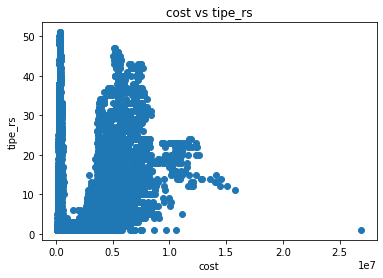

In [49]:
plt.scatter(case_cost['unit_cost'],case_cost['tipe_rs'])
plt.title("cost vs tipe_rs")
plt.xlabel('cost')
plt.ylabel('tipe_rs')

<AxesSubplot:xlabel='unit_cost'>

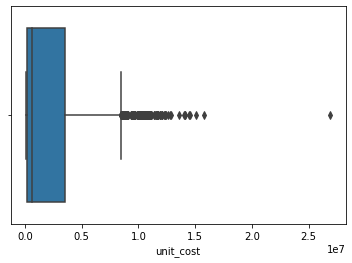

In [50]:
sns.boxplot(x=case_cost['unit_cost'])

In [51]:
case_cost['unit_cost'].idxmax()

52138

In [52]:
case_cost.iloc[52138]

kddati2          246.000
tkp               40.000
peserta       193724.000
case             458.000
unit_cost    2915721.358
tipe_rs            2.000
Name: 52139, dtype: float64

In [53]:
case_cost = case_cost.drop([52137, 52138], axis=0)

<AxesSubplot:xlabel='unit_cost'>

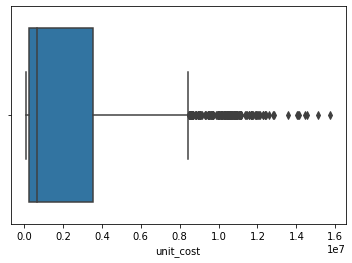

In [54]:
import seaborn as sns
sns.boxplot(x=case_cost['unit_cost'])

Text(0, 0.5, 'tipe_rs')

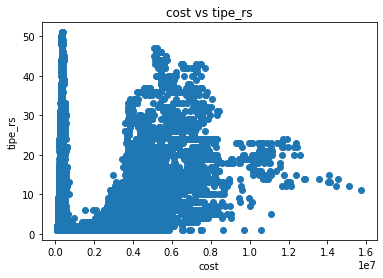

In [55]:
plt.scatter(case_cost['unit_cost'],case_cost['tipe_rs'])
plt.title("cost vs tipe_rs")
plt.xlabel('cost')
plt.ylabel('tipe_rs')

## MODELING

Case

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn import preprocessing
from sklearn import datasets
from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [57]:
X = case_cost[['kddati2', 'tkp', 'peserta','unit_cost', 'tipe_rs']]
y = case_cost['case']
m = len(y)

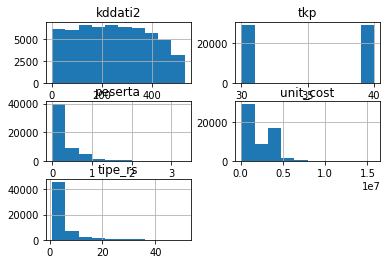

In [58]:
import matplotlib.pyplot as plt

viz = case_cost[['kddati2','tkp','peserta', 'unit_cost','tipe_rs']]
viz.hist()
plt.show()

In [59]:
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size = 0.10,random_state =2)

In [60]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [61]:
reg.score(x_test,y_test)

0.6424095423156911

In [62]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 12, min_samples_split = 2,
          learning_rate = 0.3, loss = 'ls')

In [63]:
clf.fit(x_train, y_train)

C:\Users\Dian mtd\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:294: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


GradientBoostingRegressor(learning_rate=0.3, loss='ls', max_depth=12,
                          n_estimators=400)

In [64]:
clf.score(x_test,y_test)

0.9641993904460738

In [65]:
y_pred = clf.predict(x_test)

In [66]:
print(reg.get_params())

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}


In [67]:
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)

print('Mean Absolute Error:', meanAbErr)
print("MAPE :", (np.abs(y_test - y_pred)/y_test).mean())

Mean Absolute Error: 872.9092781202397
MAPE : 0.7323808732656785


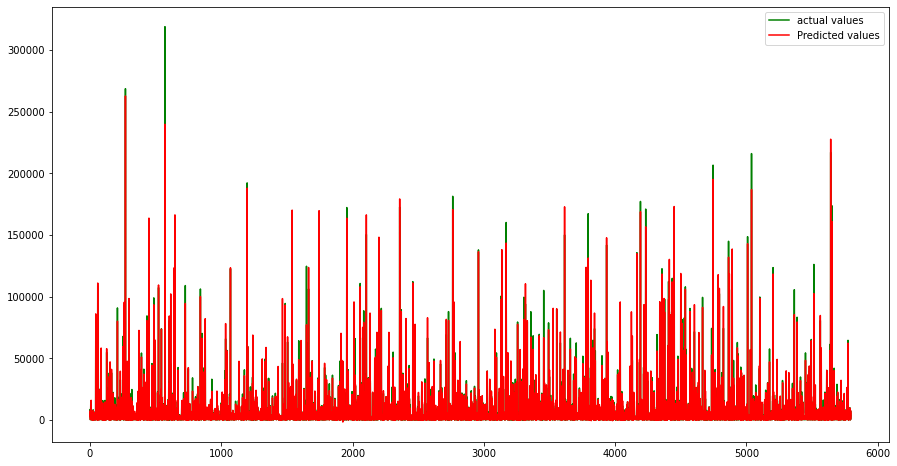

In [68]:
import matplotlib.pyplot as plt
# fitting the size of the plot
plt.figure(figsize=(15, 8))
# plotting the graphs
plt.plot([i for i in range(len(y_test))],y_test, color = 'green',label="actual values")
plt.plot([i for i in range(len(y_test))],y_pred, color='red', label="Predicted values")
# showing the plotting
plt.legend()
plt.show()

In [69]:
from joblib import Parallel, delayed
import joblib
  
joblib.dump(reg, 'case.pkl')


['case.pkl']

In [70]:
import pickle
pickle.dump(reg, open('case.pkl','wb'))

## Cost

In [71]:
m = case_cost[['kddati2', 'tkp', 'peserta', 'case', 'tipe_rs']]
n = case_cost['unit_cost']

In [72]:
m_train , m_test , n_train , n_test = train_test_split(m , n , test_size = 0.10,random_state =2)

In [73]:
reg = LinearRegression()
reg.fit(m_train,n_train)

LinearRegression()

In [74]:
print(reg.get_params())

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}


In [75]:
reg.score(m_test,n_test)

0.8681067199086936

In [76]:
from sklearn import ensemble
cost = ensemble.GradientBoostingRegressor(n_estimators = 1000, max_depth = 18, min_samples_split = 4,
          learning_rate = 0.3, loss = 'ls')

In [77]:
cost.fit(m_train, n_train)

C:\Users\Dian mtd\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_gb.py:294: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


GradientBoostingRegressor(learning_rate=0.3, loss='ls', max_depth=18,
                          min_samples_split=4, n_estimators=1000)

In [78]:
cost.score(m_test,n_test)

0.9806306359649714

In [79]:
n_pred = cost.predict(m_test)

In [80]:
meanAbErr = metrics.mean_absolute_error(n_test, n_pred)
meanSqErr = metrics.mean_squared_error(n_test, n_pred)

print('Mean Absolute Error:', meanAbErr)
print("MAPE :", (np.abs(n_test - n_pred)/n_test).mean())

Mean Absolute Error: 115424.91421851912
MAPE : 0.06959683995773165


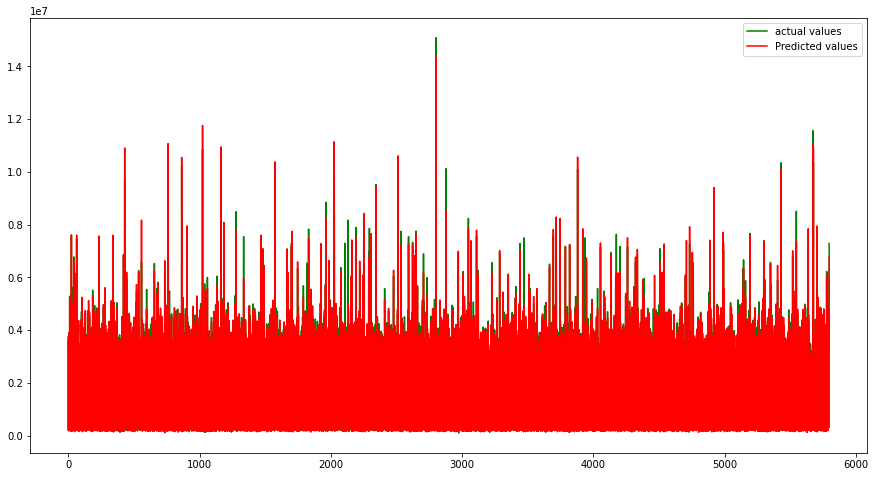

In [81]:
import matplotlib.pyplot as plt
# fitting the size of the plot
plt.figure(figsize=(15, 8))
# plotting the graphs
plt.plot([i for i in range(len(n_test))],n_test, color = 'green',label="actual values")
plt.plot([i for i in range(len(n_test))],n_pred, color='red', label="Predicted values")
# showing the plotting
plt.legend()
plt.show()

In [82]:
from joblib import Parallel, delayed
import joblib
  
joblib.dump(reg, 'cost.pkl')

['cost.pkl']

In [83]:
import pickle
pickle.dump(reg, open('cost.pkl','wb'))